# Abstract


In this project, predictive analysis of dataset "Titanic: Machine Learning from Disaster'' available on kaggle is explored. This determines the passenger survival chances on the RMS Titanic. With a dataset of 891 individuals containing features like sex, age, and class, we attempt to predict the survivors of a small test group of 418.


DATASET:
https://www.kaggle.com/datasets/shabukc/titanic-survival-prediction 



# Importing Libraries


Data analysis and wrangling

In [88]:
#installing dependencies
!pip install eli5
!pip install missingno

import numpy as np
import pandas as pd
import random as rnd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Data Visualization Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


# Importing & Reading Dataset


Data Import

In [3]:
train=pd.read_csv('https://raw.githubusercontent.com/pawarpa/Data-Science-Engineering_Assignment-1/main/train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/pawarpa/Data-Science-Engineering_Assignment-1/main/test.csv')
gender_submission=pd.read_csv('https://raw.githubusercontent.com/pawarpa/Data-Science-Engineering_Assignment-1/main/gender_submission.csv')
combine=[train,test]
titanic=pd.concat(combine) 

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [5]:
titanic.shape

(1309, 12)

In [6]:
titanic.head() # .head() displays the first five rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Check Columns

In [8]:
titanic.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [11]:
titanic.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

**Q. What are the data types?**

1.  PassengerId : Numerical
2.  Survived : Categorical
3.  Pclass : Categorical
4.  Name	: Categorical
5.  Sex : Categorical
6.  Age	: Numerical
7.  SibSp	: Numerical
8.  Parch : Numerical
9.  Ticket : Categorical
10. Fare : Numerical	
11. Cabin	: Categorical
12. Embarked : Categorical

**Q. Likely distributions of the numeric variables**

In [12]:
titanic.describe().round(0)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.0,891.0,1309.0,1046.0,1309.0,1309.0,1308.0
mean,655.0,0.0,2.0,30.0,0.0,0.0,33.0
std,378.0,0.0,1.0,14.0,1.0,1.0,52.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,328.0,0.0,2.0,21.0,0.0,0.0,8.0
50%,655.0,0.0,3.0,28.0,0.0,0.0,14.0
75%,982.0,1.0,3.0,39.0,1.0,0.0,31.0
max,1309.0,1.0,3.0,80.0,8.0,9.0,512.0


In [13]:
range_PassengerId= titanic.PassengerId.max()- titanic.PassengerId.min()
print("PassengerId Range : " ,titanic.PassengerId.min(),"-", range_PassengerId.round())

range_Age= titanic.Age.max()- titanic.Age.min()
print("Age Range : " ,titanic.Age.min(),"-", range_Age.round())

range_SibSp= titanic.SibSp.max()- titanic.SibSp.min()
print("SibSp Range : " ,titanic.SibSp.min(),"-", range_SibSp.round())

range_Parch= titanic.Parch.max()- titanic.Parch.min()
print("Parch Range : " ,titanic.Parch.min(),"-", range_Parch.round())

range_Fare= titanic.Fare.max()- titanic.Fare.min()
print("Fare Range : " ,titanic.Fare.min(),"-", range_Fare.round())

PassengerId Range :  1 - 1308
Age Range :  0.17 - 80.0
SibSp Range :  0 - 8
Parch Range :  0 - 9
Fare Range :  0.0 - 512.0


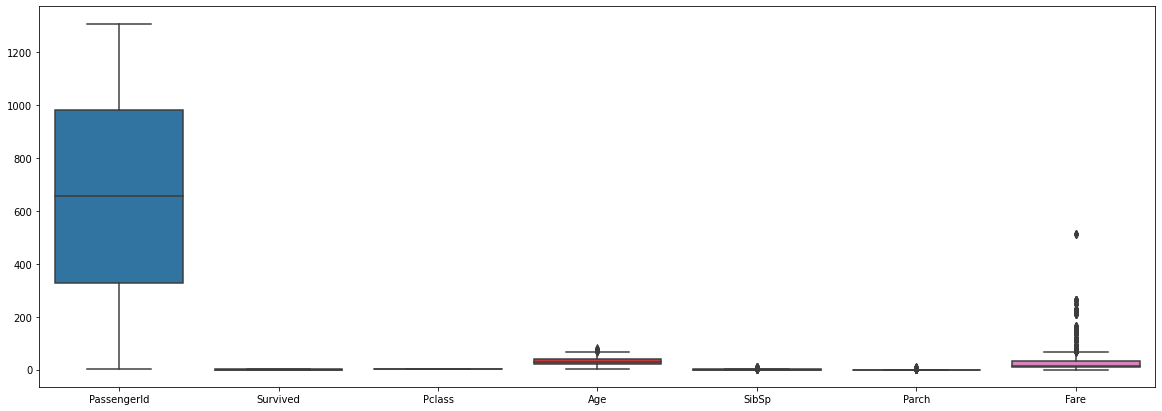

In [14]:
plt.figure(figsize=(20,7))
sns.boxplot(data=titanic)

# Missing Values


In [15]:
titanic.isnull().sum().sort_values()

PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Embarked          2
Age             263
Survived        418
Cabin          1014
dtype: int64

**Q. Are there missing values?**

**Q. Which independent variable have missing data? How much?**

Survived, Age, Fare, Cabin and Embarked consists of missing values

In [16]:
titanic.isnull().sum().sort_values(ascending=False)/titanic.shape[0]*100

Cabin          77.463713
Survived       31.932773
Age            20.091673
Embarked        0.152788
Fare            0.076394
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
dtype: float64

Text(0.5, 1.0, 'Missing values Bar')

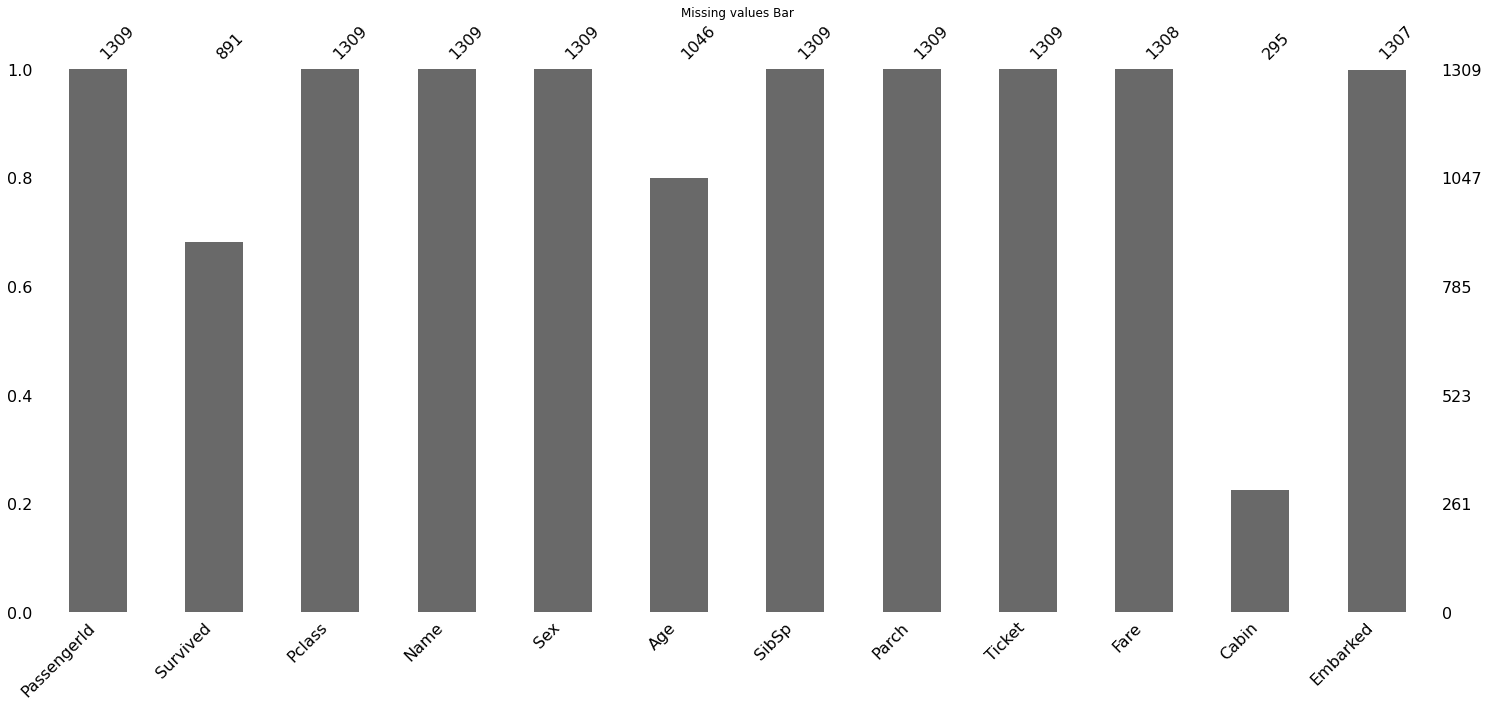

In [17]:
msno.bar(titanic).set_title("Missing values Bar")

Text(0.5, 1.0, 'Missing values heatmap')

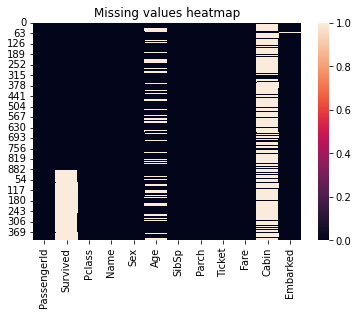

In [18]:
sns.heatmap(titanic.isnull()).set_title("Missing values heatmap")

# Train & Test Data

**Q. Do the training and test sets have the same data?**


In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [22]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [25]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Correlation


In [27]:
titanic.corr() #checking the correlation between all the features in the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


Heat map of the correlation

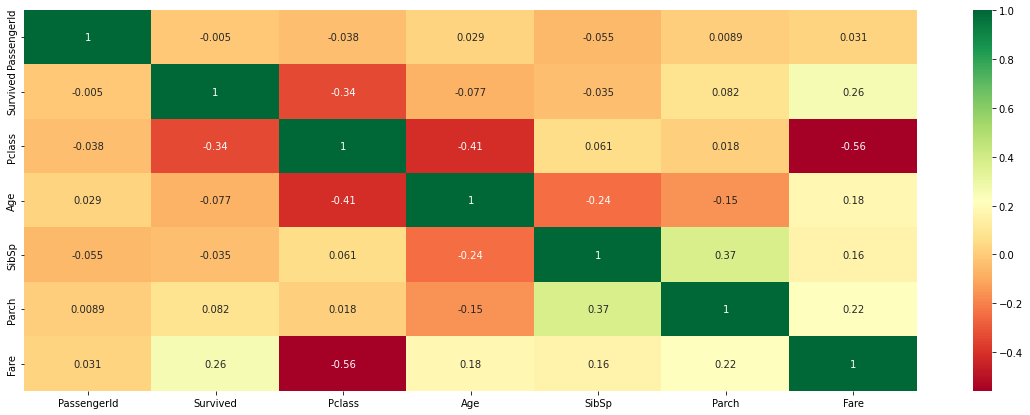

In [28]:
plt.figure(figsize=(20,7))
sns.heatmap(titanic.corr(), annot=True, cmap='RdYlGn')

There is a moderately negative correlation (-0.34) between Pclass and Survival, which suggests that a higher ticket class is associated with a greater chance of survival.

There is a negative correlation between PClass and Age of -0.37, which suggests that the higher the age, the better the ticket class.

Fare and Pclass are negatively correlated (Pearson's correlation coefficient is -0.55); Clearly, higher fares imply better ticket classes (lower class number) and vice versa.

Both the SibSp and Parch features are positively correlated which explains how many family members are with the passenger.

# Outliers Handling


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


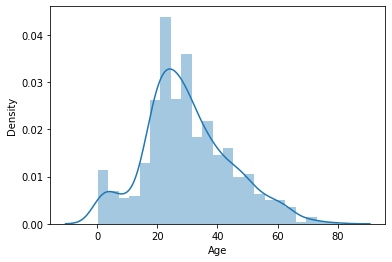

In [29]:
sns.distplot(titanic['Age'].dropna())

Text(0, 0.5, 'No. of Passengers')

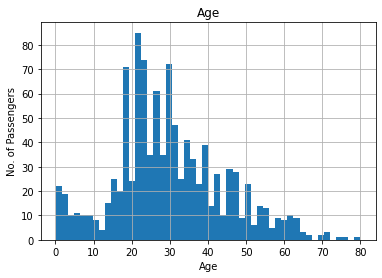

In [30]:
figure=titanic.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of Passengers')

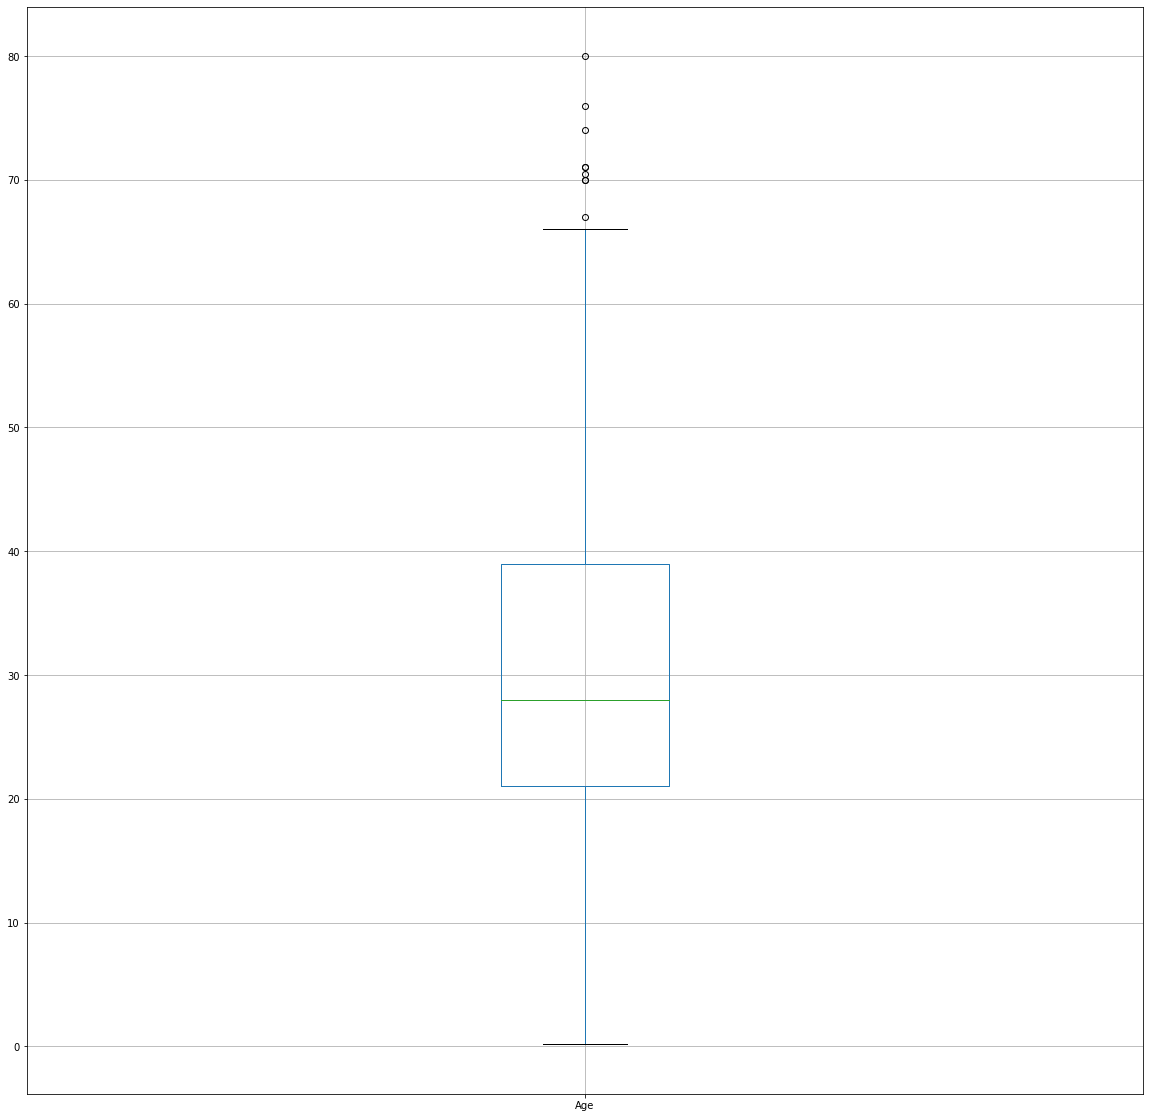

In [31]:
figure= titanic.boxplot(column="Age", figsize=(20,20))


In [32]:
titanic['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [33]:
upper_boundary=titanic['Age'].mean() + 1.5* titanic['Age'].std()
lower_boundary=titanic['Age'].mean() - 1.5* titanic['Age'].std()
print(lower_boundary), print(upper_boundary),print(titanic['Age'].mean())

8.260897850397033
51.50137748421099
29.881137667304014


(None, None, None)

In [34]:
##### Assuming Age follows a Gaussian Distribution, we will calculate the boundaries which differentiates the outliers

upper_boundary=titanic['Age'].mean() + 3* titanic['Age'].std()
lower_boundary=titanic['Age'].mean() - 3* titanic['Age'].std()
print(lower_boundary), print(upper_boundary),print(titanic['Age'].mean())

-13.359341966509948
73.12161730111798
29.881137667304014


(None, None, None)

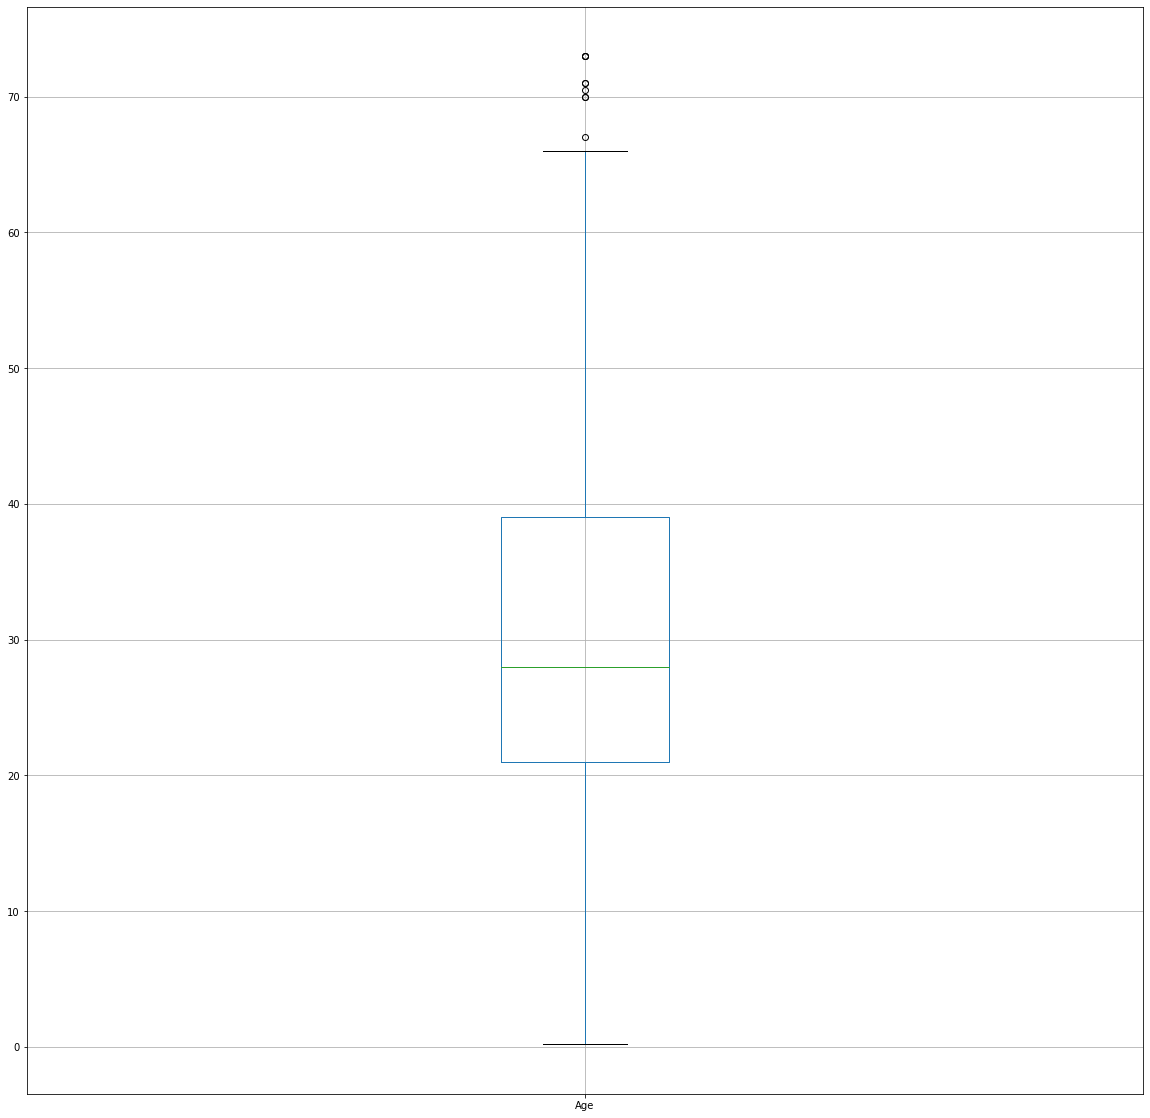

In [35]:
titanic.loc[titanic['Age']>=73,'Age']=73
figure=titanic.boxplot(column="Age",figsize=(20,20))

Text(0, 0.5, 'No. of Passengers')

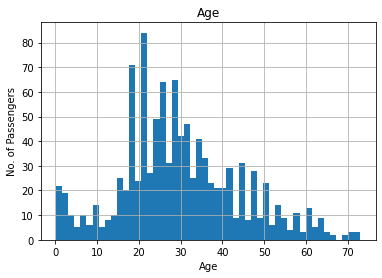

In [36]:
figure=titanic.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of Passengers')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


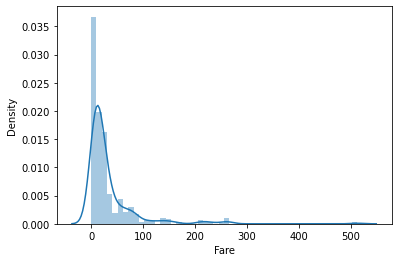

In [37]:
sns.distplot(titanic['Fare'].dropna())

Text(0, 0.5, 'No. of Passengers')

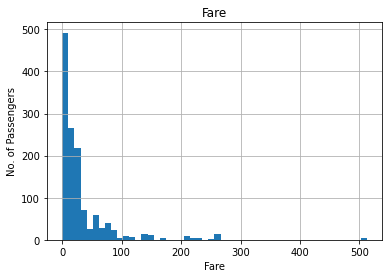

In [38]:
figure=titanic.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passengers')

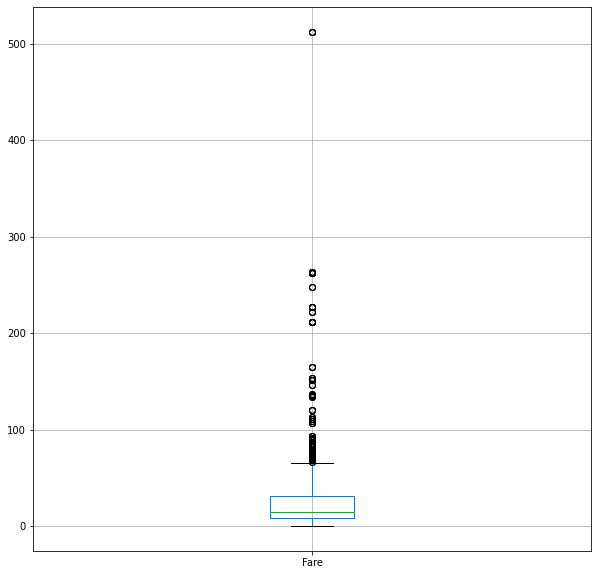

In [39]:
titanic.boxplot(column="Fare",figsize=(10,10))

In [40]:
titanic['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [41]:
IQR=titanic.Fare.quantile(0.75)-titanic.Fare.quantile(0.25)
lower_bridge=titanic['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=titanic['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-27.172999999999995
66.34379999999999


(None, None)

In [42]:
lower_bridge=titanic['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=titanic['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-62.24179999999999
101.4126


(None, None)

In [43]:
titanic.loc[titanic['Fare']>=66,'Fare']=66

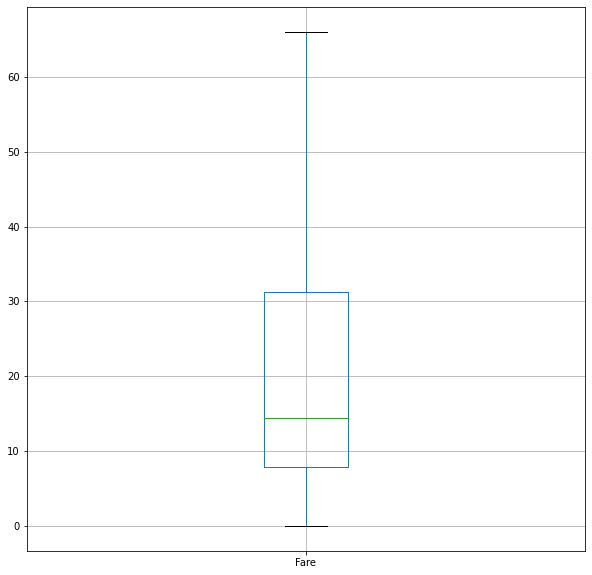

In [44]:
titanic.boxplot(column="Fare",figsize=(10,10))

Text(0, 0.5, 'No. of Passengers')

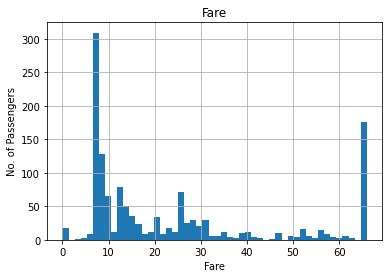

In [45]:
figure=titanic.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passengers')

# Feature Engineering



Breaking down Passenger Name into additional meaningful variables which can feed predictions or be used in the creation of additional new variables. For instance, passenger title within the passenger name variable.


In [46]:
titanic_title = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [47]:
# Create Pclass Label Column
titanic['Pclass'] = titanic.Pclass.map({1 : '1st Class', 2 : '2nd Class', 3 : '3rd Class'})
titanic.Pclass.head()

0    3rd Class
1    1st Class
2    3rd Class
3    1st Class
4    3rd Class
Name: Pclass, dtype: object

In [48]:
# Create Survival Label Column
titanic['Survived'] = titanic.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic.Survived.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survived, dtype: object

In [49]:
# Create Port Label Column
titanic['Ports'] = titanic.Embarked.map({'S' : 'Southhampton', 'C' : 'Cherbourg', 'Q' : 'Queenstown'})
titanic.Ports.head()

0    Southhampton
1       Cherbourg
2    Southhampton
3    Southhampton
4    Southhampton
Name: Ports, dtype: object

# One Hot Encoding


In [50]:
titanic['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 1309, dtype: object

In [51]:
sex_encoded = pd.get_dummies(titanic['Sex'],prefix='Sex')

In [52]:
sex_encoded

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [53]:
titanic = pd.concat([titanic, sex_encoded], axis=1)

In [54]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ports,Sex_female,Sex_male
0,1,Died,3rd Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southhampton,0,1
1,2,Survived,1st Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,66.0000,C85,C,Cherbourg,1,0
2,3,Survived,3rd Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southhampton,1,0
3,4,Survived,1st Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southhampton,1,0
4,5,Died,3rd Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Southhampton,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3rd Class,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Southhampton,0,1
414,1306,NaN,1st Class,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,66.0000,C105,C,Cherbourg,1,0
415,1307,NaN,3rd Class,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Southhampton,0,1
416,1308,NaN,3rd Class,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Southhampton,0,1


# Data Imputation


Since there were only two missing values for 'Embarked' and the most commuters boarded from Southampton, the probability of boarding from Southampton is greater. Therefore, Southampton is used to fill in any missing values in Embarked column. 
Here, we have considered the mode (most frequently appearing value) of 'Embarked' column 

In [55]:
titanic.Embarked.fillna(titanic.Embarked.mode()[0], inplace = True)


Cabin has many 1014 missing values. I reclassified all missing data as NA, replacing all missing values.

In [56]:
titanic.Cabin = titanic.Cabin.fillna('NA')

Dealing with Age column null values 

In [57]:
titanic['Age'].mean() # Mean age


29.870621414913956

In [58]:
(titanic.groupby(['Sex']))['Age'].mean()

Sex
female    28.679356
male      30.573070
Name: Age, dtype: float64

In [59]:
(titanic.groupby(['Pclass','Sex']))['Age'].mean()

Pclass     Sex   
1st Class  female    37.015038
           male      40.982914
2nd Class  female    27.499223
           male      30.815380
3rd Class  female    22.185329
           male      25.959398
Name: Age, dtype: float64

In [60]:
(titanic.groupby(['Pclass','Survived','Sex']))['Age'].mean()

Pclass     Survived  Sex   
1st Class  Died      female    25.666667
                     male      44.581967
           Survived  female    34.939024
                     male      36.073000
2nd Class  Died      female    36.000000
                     male      33.369048
           Survived  female    28.080882
                     male      16.022000
3rd Class  Died      female    23.818182
                     male      27.251163
           Survived  female    19.329787
                     male      22.274211
Name: Age, dtype: float64

In [61]:
(titanic.groupby(['Pclass', 'Survived', 'Sex']))['Age'].describe()


count       mean        std    min    25%   50%  \
Pclass    Survived Sex                                                       
1st Class Died     female    3.0  25.666667  24.006943   2.00  13.50  25.0   
                   male     61.0  44.581967  14.457749  18.00  33.00  45.5   
          Survived female   82.0  34.939024  13.223014  14.00  23.25  35.0   
                   male     40.0  36.073000  14.443873   0.92  27.00  36.0   
2nd Class Died     female    6.0  36.000000  12.915107  24.00  26.25  32.5   
                   male     84.0  33.369048  12.158125  16.00  24.75  30.5   
          Survived female   68.0  28.080882  12.764693   2.00  21.75  28.0   
                   male     15.0  16.022000  19.547122   0.67   1.00   3.0   
3rd Class Died     female   55.0  23.818182  12.833465   2.00  15.25  22.0   
                   male    215.0  27.251163  12.117886   1.00  20.00  25.0   
          Survived female   47.0  19.329787  12.303246   0.75  13.50  19.0   
                   male     38.0  22.274211  11.555786   0.42  16.50  25.0   

                             75%   max  
Pclass    Survived Sex                  
1st Class Died     female  37.50  50.0  
                   male    56.00  71.0  
          Survived female  44.00  63.0  
                   male    48.00  73.0  
2nd Class Died     female  42.50  57.0  
                   male    39.00  70.0  
          Survived female  35.25  55.0  
                   male    31.50  62.0  
3rd Class Died     female  31.00  48.0  
                   male    34.00  73.0  
          Survived female  26.50  63.0  
                   male    29.75  45.0

In [62]:
sex = titanic['Sex']
survived = titanic['Survived']
pclass = titanic['Pclass']
age_children = titanic['Age'] < 18
pd.crosstab([sex, pclass, age_children], survived)

Survived                Died  Survived
Sex    Pclass    Age                  
female 1st Class False     2        84
                 True      1         7
       2nd Class False     6        58
                 True      0        12
       3rd Class False    56        53
                 True     16        19
male   1st Class False    77        41
                 True      0         4
       2nd Class False    89         8
                 True      2         9
       3rd Class False   267        37
                 True     33        10

In [63]:
titanic['Age_nonull'] = titanic['Age']
titanic['Age_nonull'] = titanic['Age_nonull'] \
    .groupby([titanic['Pclass'], titanic['Survived'], titanic['Sex']]) \
    .apply(lambda x: x.fillna(x.mean()))

In [64]:
# Create a new column that has all ages by bin category: 0-10:10, 10-20:20, 20-30:30, 30-40:40
# 40-50:50, 50-60:60, 60-70:70, 70-80:80
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
group_names = [10, 20, 30, 40, 50, 60, 70, 80]

titanic['Age_Categories'] = pd.cut(titanic['Age_nonull'], bins, labels=group_names)
titanic[['Age', 'Age_nonull', 'Age_Categories']].head()

,Age,Age_nonull,Age_Categories
0,22.0,22.0,30
1,38.0,38.0,40
2,26.0,26.0,30
3,35.0,35.0,40
4,35.0,35.0,40


In [65]:
titanic['Age_Categories'] = pd.to_numeric(titanic['Age_Categories'])

In [66]:
titanic=titanic.dropna()

In [67]:
titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
Ports             0
Sex_female        0
Sex_male          0
Age_nonull        0
Age_Categories    0
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

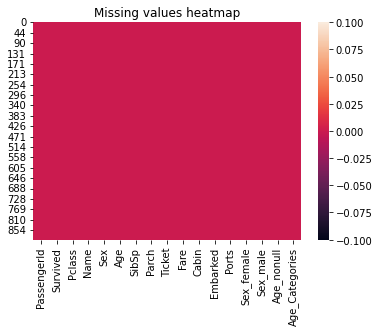

In [68]:
sns.heatmap(titanic.isnull()).set_title("Missing values heatmap")

Range of Numeric Variables after removing the null values

In [69]:
range_PassengerId= titanic.PassengerId.max()- titanic.PassengerId.min()
print("PassengerId Range : " ,titanic.PassengerId.min(),"-", range_PassengerId.round())

range_Age= titanic.Age.max()- titanic.Age.min()
print("Age Range : " ,titanic.Age.min(),"-", range_Age.round())

range_SibSp= titanic.SibSp.max()- titanic.SibSp.min()
print("SibSp Range : " ,titanic.SibSp.min(),"-", range_SibSp.round())

range_Parch= titanic.Parch.max()- titanic.Parch.min()
print("Parch Range : " ,titanic.Parch.min(),"-", range_Parch.round())

range_Fare= titanic.Fare.max()- titanic.Fare.min()
print("Fare Range : " ,titanic.Fare.min(),"-", range_Fare.round())

PassengerId Range :  1 - 890
Age Range :  0.42 - 73.0
SibSp Range :  0 - 5
Parch Range :  0 - 6
Fare Range :  0.0 - 66.0


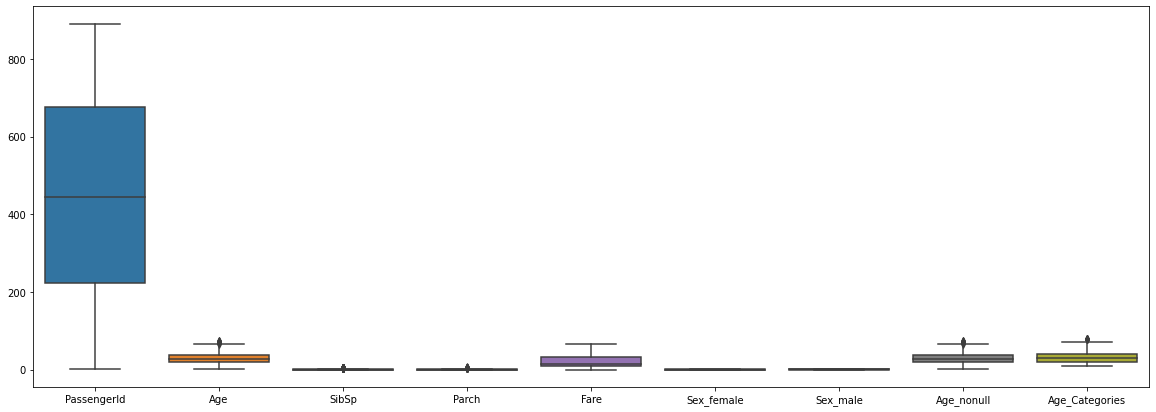

In [70]:
plt.figure(figsize=(20,7))
sns.boxplot(data=titanic)

# Plots

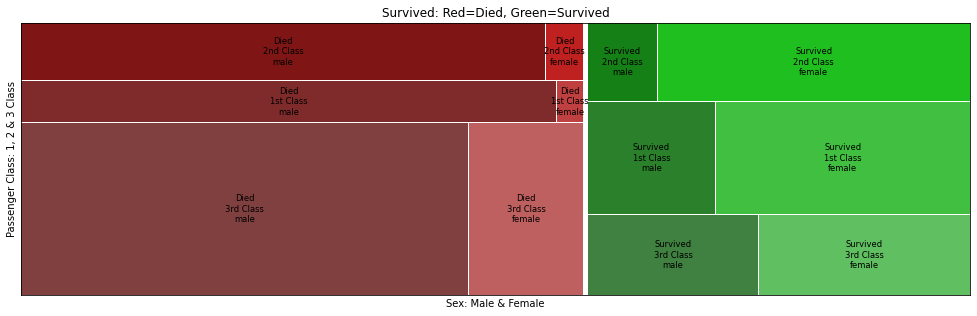

In [71]:
plt.rc('figure', figsize=(17, 5))
from statsmodels.graphics.mosaicplot import mosaic
mosaic(titanic,['Survived', 'Pclass', 'Sex'], axes_label=False, title='Survived: Red=Died, Green=Survived')
plt.xlabel('Sex: Male & Female')
plt.ylabel('Passenger Class: 1, 2 & 3 Class')
plt.show()

Text(0.5, 0, 'Age Categories by Decade (years)')

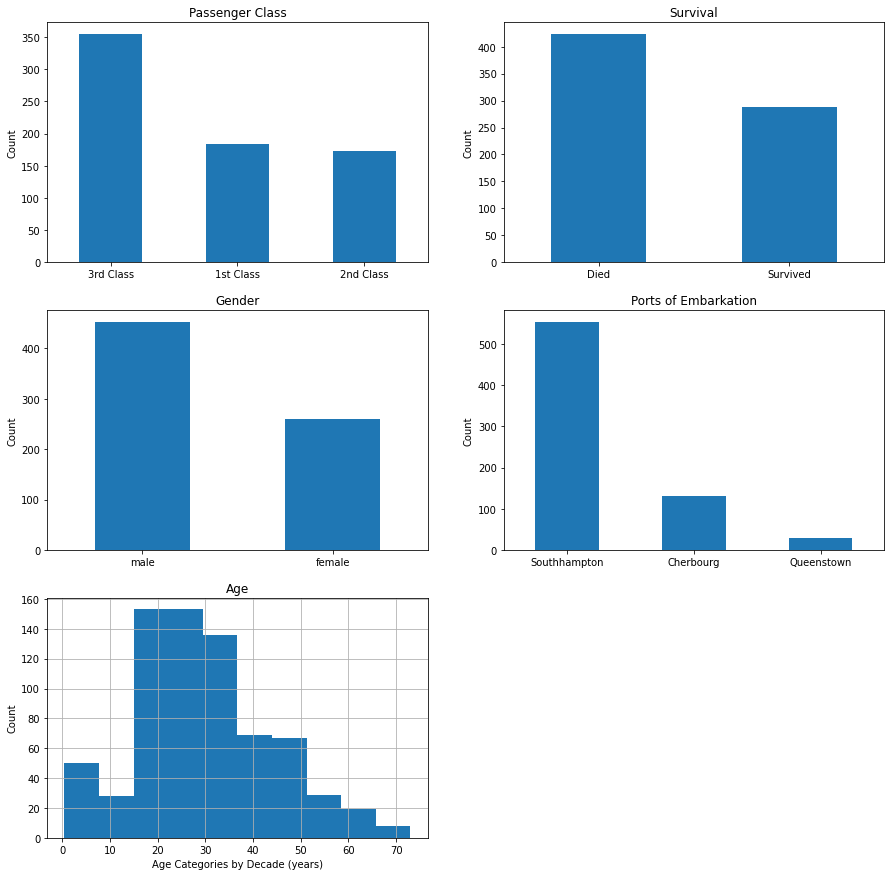

In [72]:

# Figure size
plt.rc('figure', figsize=(15, 15))
# Histogram bin size
bin_size = 10

# Setup a figue of plots
#fig = plt.figure() 
fig_size = (3, 2)


# Plot Pclass counts
plt.subplot2grid(fig_size, (0, 0))
titanic['Pclass'].value_counts().plot(kind='bar', title='Passenger Class')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Survival counts
plt.subplot2grid(fig_size, (0, 1))
titanic['Survived'].value_counts().plot(kind='bar', title='Survival')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Sex counts
plt.subplot2grid(fig_size, (1, 0))
titanic['Sex'].value_counts().plot(kind='bar', title='Gender')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Port counts
plt.subplot2grid(fig_size, (1, 1))
titanic['Ports'].value_counts().plot(kind='bar', title='Ports of Embarkation')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Age histogram
plt.subplot2grid(fig_size, (2, 0))
titanic['Age'].hist()
plt.title('Age')
plt.ylabel('Count')
plt.xlabel('Age Categories by Decade (years)')

Survival count by Sex, Embarked_Numeric, Pclass and Age Category

In [73]:
embarked = titanic['Ports']
sex = titanic['Sex']
survived = titanic['Survived']
pclass = titanic['Pclass']
age_cat = titanic['Age_Categories']
pd.crosstab([sex, embarked, pclass], [survived, age_cat])

Survived                      Died                          Survived         \
Age_Categories                  10  20  30  40  50 60 70 80       10 20  30   
Sex    Ports        Pclass                                                    
female Cherbourg    1st Class    0   0   0   0   1  0  0  0        0  5  10   
                    2nd Class    0   0   0   0   0  0  0  0        1  2   4   
                    3rd Class    1   3   0   0   1  0  0  0        5  4   2   
       Queenstown   1st Class    0   0   0   0   0  0  0  0        0  0   0   
                    2nd Class    0   0   0   0   0  0  0  0        0  0   1   
                    3rd Class    0   1   1   3   0  0  0  0        0  4   1   
       Southhampton 1st Class    1   0   1   0   0  0  0  0        0  8  10   
                    2nd Class    0   0   3   1   1  1  0  0        7  6  20   
                    3rd Class   10   8  15   5   7  0  0  0        6  5  13   
male   Cherbourg    1st Class    0   1   6   3   3  4  1  2        0  1   5   
                    2nd Class    0   0   4   3   0  0  0  0        1  0   0   
                    3rd Class    0   4   8   5   1  0  0  0        1  3   3   
       Queenstown   1st Class    0   0   0   0   1  0  0  0        0  0   0   
                    2nd Class    0   0   0   0   0  1  0  0        0  0   0   
                    3rd Class    4   1   2   3   1  0  1  1        0  0   1   
       Southhampton 1st Class    0   2   4   9  11  6  8  0        2  1   4   
                    2nd Class    0   9  29  20   8  8  2  0        8  1   0   
                    3rd Class   10  42  73  34  18  5  1  1        7  4  10   

Survived                                       
Age_Categories                 40 50 60 70 80  
Sex    Ports        Pclass                     
female Cherbourg    1st Class   9  7  6  0  0  
                    2nd Class   0  0  0  0  0  
                    3rd Class   0  0  0  0  0  
       Queenstown   1st Class   1  0  0  0  0  
                    2nd Class   0  0  0  0  0  
                    3rd Class   0  0  0  0  0  
       Southhampton 1st Class  13  5  5  1  0  
                    2nd Class  16  9  2  0  0  
                    3rd Class   6  0  0  1  0  
male   Cherbourg    1st Class   5  3  2  0  0  
                    2nd Class   0  0  0  0  0  
                    3rd Class   0  0  0  0  0  
       Queenstown   1st Class   0  0  0  0  0  
                    2nd Class   0  0  0  0  0  
                    3rd Class   0  0  0  0  0  
       Southhampton 1st Class   8  6  2  0  1  
                    2nd Class   3  1  0  1  0  
                    3rd Class   7  2  0  0  0

In [74]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Ports', 'Sex_female',
       'Sex_male', 'Age_nonull', 'Age_Categories'],
      dtype='object')

In [75]:
##Checking categorical data with datatype object 
categorical = titanic.select_dtypes("object").columns
categorical

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked',
       'Ports'],
      dtype='object')

In [76]:
#converting categorical data into numerical data using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for item in categorical:
    le.fit(titanic[item])
    titanic[item] = le.transform(titanic[item])

for cat in categorical:
  print(f"The current column is : {cat}\n")
  print(titanic[cat].value_counts())
  print("-" *100 +"\n\n")

The current column is : Survived

0    424
1    288
Name: Survived, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : Pclass

2    355
0    184
1    173
Name: Pclass, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : Name

103    1
384    1
145    1
663    1
365    1
      ..
17     1
70     1
367    1
16     1
205    1
Name: Name, Length: 712, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : Sex

1    453
0    259
Name: Sex, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : Ticket

273    7
445    6
207    6
277    6
490    5
      ..
142    1
171    1
302    1
303    1
370    1
Name: Ticket, Length: 541, dtype: int64
------------

<ipython-input-76-2a8bfbf487e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic[item] = le.transform(titanic[item])


In [77]:
import statsmodels.formula.api as sm
# OLS modeling for Survived and Gender
result_1 = sm.ols(formula='Survived ~ Sex', data=titanic).fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     287.3
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           2.24e-54
Time:                        03:51:22   Log-Likelihood:                -382.55
No. Observations:                 712   AIC:                             769.1
Df Residuals:                     710   BIC:                             778.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7529      0.026     29.219      0.000       0.702       0.803
Sex           -0.5476      0.032    -16.951      0.000      -0.611      -0.484
==============================================================================
Omnibus:                       17.274   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.064
Skew:                           0.380   Prob(JB):                     0.000120
Kurtosis:                       2.819   Cond. No.                         3.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# OLS modeling for Survived and Class
result_2 = sm.ols(formula='Survived ~ Pclass', data=titanic).fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           9.30e-23
Time:                        03:51:22   Log-Likelihood:                -455.15
No. Observations:                 712   AIC:                             914.3
Df Residuals:                     710   BIC:                             923.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6639      0.031     21.570      0.000       0.604       0.724
Pclass        -0.2092      0.021    -10.166      0.000      -0.250      -0.169
==============================================================================
Omnibus:                     1245.896   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.447
Skew:                           0.340   Prob(JB):                     1.67e-14
Kurtosis:                       1.705   Cond. No.                         3.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# OLS modeling for Survived and Ports
result_3 = sm.ols(formula='Survived ~ Ports', data=titanic).fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     24.32
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           1.02e-06
Time:                        03:51:22   Log-Likelihood:                -491.54
No. Observations:                 712   AIC:                             987.1
Df Residuals:                     710   BIC:                             996.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5875      0.041     14.225      0.000       0.506       0.669
Ports         -0.1147      0.023     -4.931      0.000      -0.160      -0.069
==============================================================================
Omnibus:                     3596.518   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.561
Skew:                           0.390   Prob(JB):                     1.97e-23
Kurtosis:                       1.292   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# OLS modeling for Survived and Age
result_4 = sm.ols(formula='Survived ~ Age_nonull', data=titanic).fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.973
Date:                Sun, 05 Feb 2023   Prob (F-statistic):             0.0261
Time:                        03:51:22   Log-Likelihood:                -501.05
No. Observations:                 712   AIC:                             1006.
Df Residuals:                     710   BIC:                             1015.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4884      0.042     11.662      0.000       0.406       0.571
Age_nonull    -0.0028      0.001     -2.230      0.026      -0.005      -0.000
==============================================================================
Omnibus:                     3188.796   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.261
Skew:                           0.386   Prob(JB):                     5.68e-26
Kurtosis:                       1.177   Cond. No.                         75.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# OLS modeling for Survived and Sex + Pclass + Age_nonull + Ports
result_5 = sm.ols(formula='Survived ~ Sex + Pclass + Age_nonull + Ports', data=titanic).fit()
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     113.6
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           9.11e-75
Time:                        03:51:22   Log-Likelihood:                -326.87
No. Observations:                 712   AIC:                             663.7
Df Residuals:                     707   BIC:                             686.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1650      0.053     21.828      0.000       1.060       1.270
Sex           -0.4742      0.031    -15.404      0.000      -0.535      -0.414
Pclass        -0.1946      0.019    -10.018      0.000      -0.233      -0.156
Age_nonull    -0.0055      0.001     -5.018      0.000      -0.008      -0.003
Ports         -0.0349      0.019     -1.822      0.069      -0.073       0.003
==============================================================================
Omnibus:                       24.841   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.774
Skew:                           0.475   Prob(JB):                     1.54e-06
Kurtosis:                       3.032   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# OLS modeling for Survived and Sex + Pclass + Age_nonull
result_6 = sm.ols(formula='Survived ~ Sex + Pclass + Age_nonull', data=titanic).fit()
result_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     149.8
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           3.55e-75
Time:                        03:51:22   Log-Likelihood:                -328.54
No. Observations:                 712   AIC:                             665.1
Df Residuals:                     708   BIC:                             683.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1249      0.049     23.100      0.000       1.029       1.221
Sex           -0.4779      0.031    -15.534      0.000      -0.538      -0.418
Pclass        -0.2029      0.019    -10.720      0.000      -0.240      -0.166
Age_nonull    -0.0056      0.001     -5.108      0.000      -0.008      -0.003
==============================================================================
Omnibus:                       24.685   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.578
Skew:                           0.473   Prob(JB):                     1.69e-06
Kurtosis:                       3.037   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Dataframe for statistical data
comp_index_4 = 'Sex + Pclass + Age_nonull + Ports'
comp_index_3 = 'Sex + Pclass + Age_nonull'

statistics_df = pd.DataFrame(
    data=[[result_1.rsquared_adj, np.sqrt(result_1.rsquared_adj)],
          [result_2.rsquared_adj, np.sqrt(result_2.rsquared_adj)],
          [result_3.rsquared_adj, np.sqrt(result_3.rsquared_adj)],
          [result_4.rsquared_adj, np.sqrt(result_4.rsquared_adj)],
          [result_5.rsquared_adj, np.sqrt(result_5.rsquared_adj)],
          [result_6.rsquared_adj, np.sqrt(result_6.rsquared_adj)]],
    index=['Sex', 'Pclass', 'Ports', 'Age', comp_index_4, comp_index_3],
    columns=['R-squared', 'Correlation to Survival']
)

statistics_df


,R-squared,Correlation to Survival
Sex,0.287110,0.535827
Pclass,0.125835,0.354733
Ports,0.031755,0.178198
Age,0.005556,0.074542
Sex + Pclass + Age_nonull + Ports,0.387741,0.622689
Sex + Pclass + Age_nonull,0.385736,0.621076


Ordinary least squares (OLS) regression modeling is used to determine which metric or combination of metrics offers the most accurate survival prediction. Reviewing the coefficient of determination (R-squared) confirms that the individual models for Ports and Age indicate a substantial proportion of survival variance. Gender and a combination of metrics are better models. 

The square root of R-squared equals the Pearson correlation coefficient of predicted to actual values. 

Gender has the strongest correlation of any metric.

However, the correlation between survival and the combination of Gender, Class, Age and Ports is the strongest for the model used.

Building Model

In [84]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Ports', 'Sex_female',
       'Sex_male', 'Age_nonull', 'Age_Categories'],
      dtype='object')

In [85]:
from sklearn.model_selection import  train_test_split

X = titanic[ ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Ports', 'Sex_female',
       'Sex_male', 'Age_nonull', 'Age_Categories']]

y = titanic['Survived']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

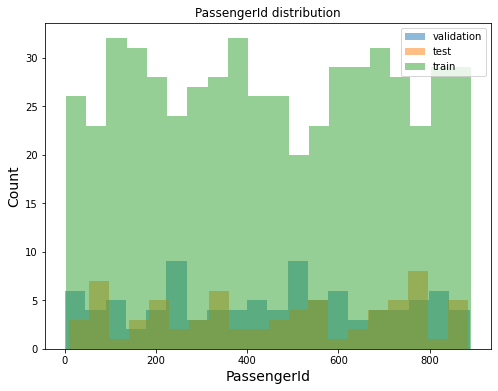

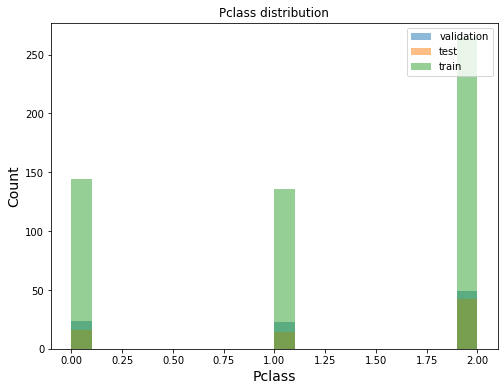

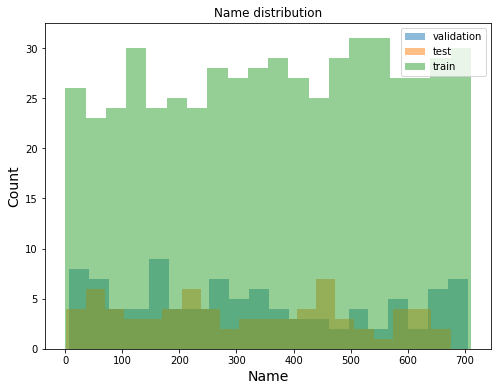

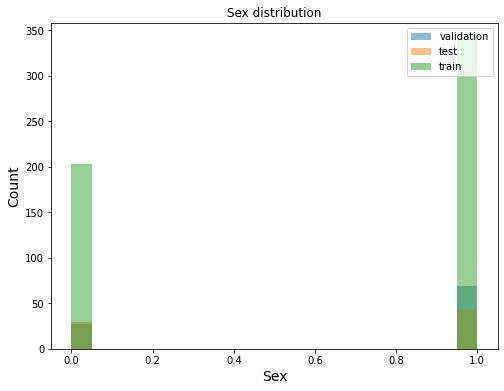

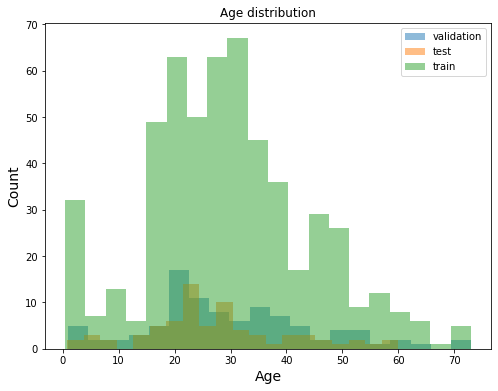

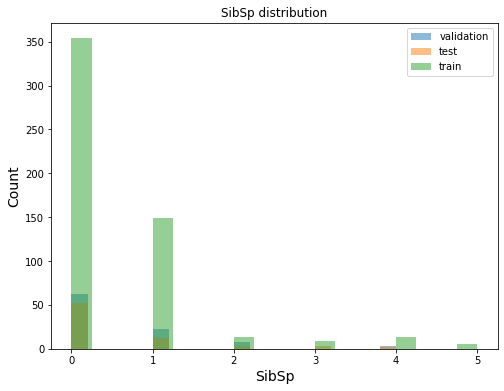

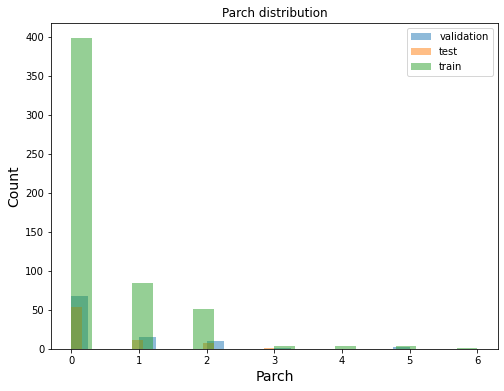

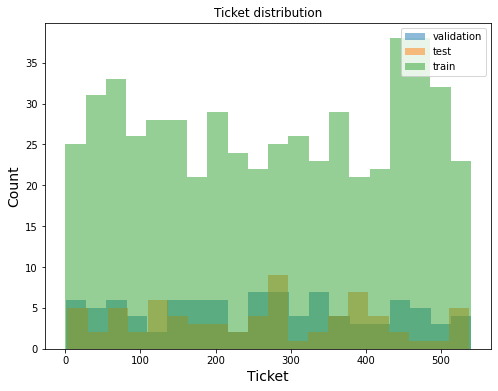

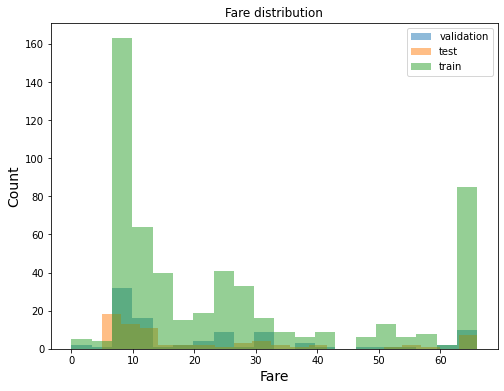

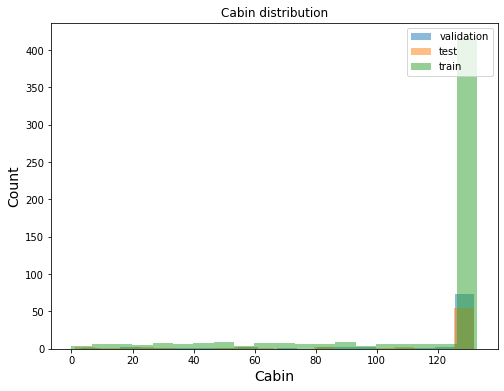

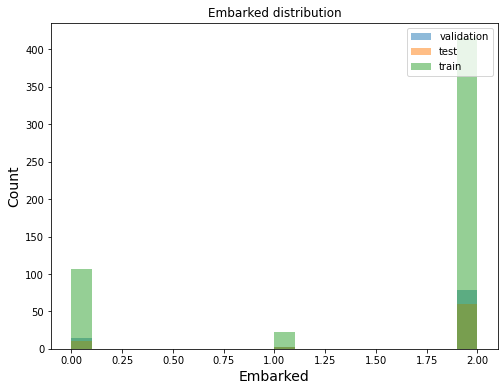

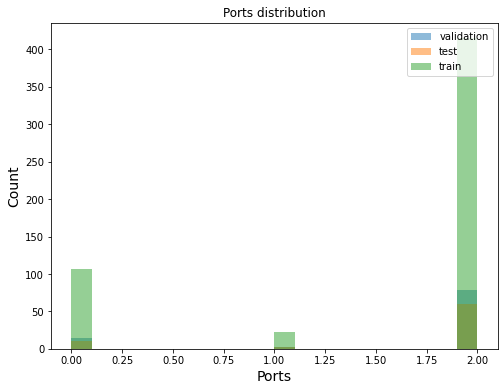

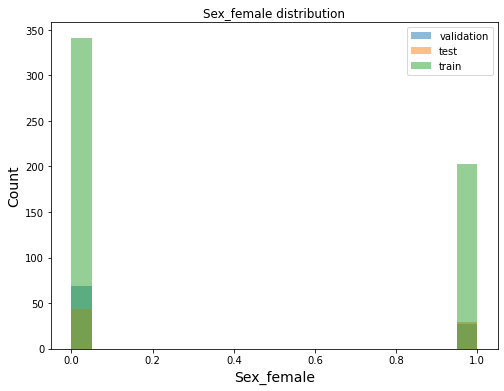

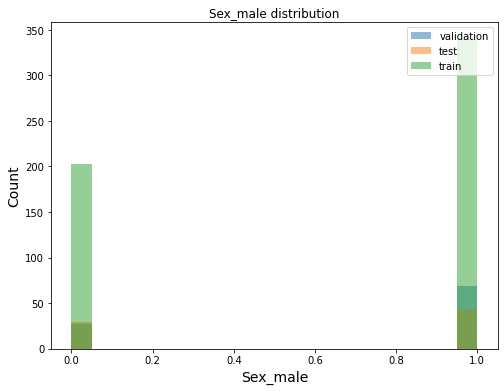

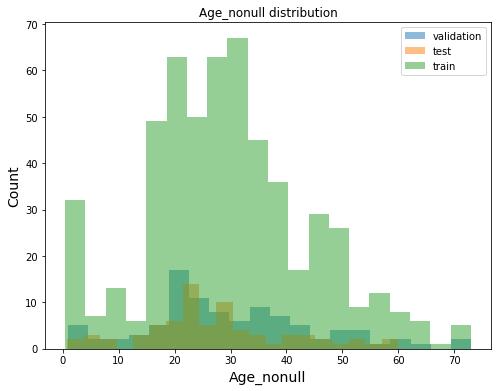

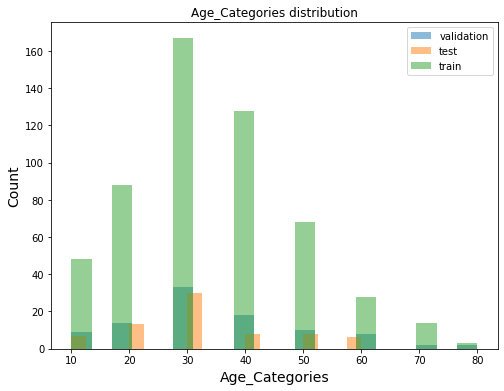

In [86]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Ports', 'Sex_female',
       'Sex_male', 'Age_nonull', 'Age_Categories']]

X_val_plot = X_val[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Ports', 'Sex_female',
       'Sex_male', 'Age_nonull', 'Age_Categories']]

X_train_plot = X_train[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Ports', 'Sex_female',
       'Sex_male', 'Age_nonull', 'Age_Categories']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

# Model

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


80.33

# Conclusion

Age, Sex, Pclass, Fare, Embarked affect the chance of a passenger’s survival

# References

References : 

1. [Scikit learn official documentation](https://scikit-learn.org/stable/)
2. [Reference Towards Data Science
](https://towardsdatascience.com/tagged/reference)
3. https://www.kaggle.com/competitions/titanic 
4.  https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

The algorithms were referred directly from the Scikit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. 

Copyright 2023 Payal Pawar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.